In [4]:
import requests
import json
import requests

from datetime import datetime
from matplotlib import pyplot as plt

#### Data import

In [12]:
api_link = "https://api.elhub.no/energy-data/v0/consumption-groups"

response = requests.get(api_link)

if response.status_code == 200:
    data = response.json()
    consumption_groups = [i["id"] for i in data["data"]]

print(consumption_groups)

['household', 'cabin', 'primary', 'secondary', 'tertiary', 'industry', 'private', 'business', '*']


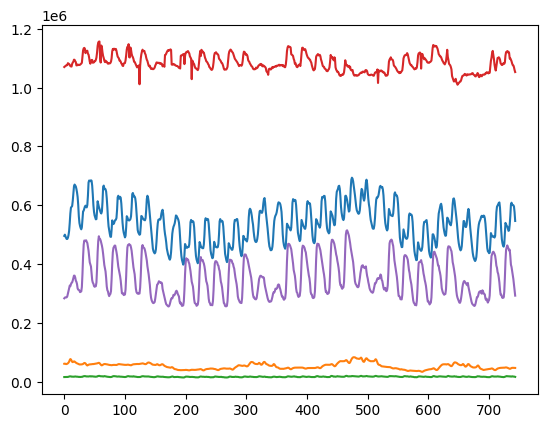

In [ ]:
def get_consumption_data(area: str, 
                         consumption_group: str,
                         start_time: datetime = datetime(year=2023, month=1, day=1), 
                         end_time: datetime = datetime(year=2023, month=2, day=1)
                         ):
    api_link = "https://api.elhub.no/energy-data/v0/price-areas"

    params = {
        "dataset": "CONSUMPTION_PER_GROUP_MBA_HOUR",
        "startDate": f"{start_time.isoformat()}+02:00",
        "endDate": f"{end_time.isoformat()}+02:00",
        "consumptionGroup": consumption_group
    }

    response = requests.get(f"{api_link}/{area}", params=params)

    try:
        data = response.json()["data"]
        response.raise_for_status()
    except requests.exceptions.HTTPError as E:
        raise E
    return data

for group in consumption_groups:
    kwh = []
    data = get_consumption_data("NO5", group)
    for time_slot in data[0]["attributes"]["consumptionPerGroupMbaHour"]:
        kwh.append(time_slot["quantityKwh"])

    plt.plot(kwh)

In [6]:
from zoneinfo import available_timezones

available_timezones()

set()

#### 1. Utvikling i strømforbruk
Hvordan har strømforbruket i **NO5** utviklet seg de siste årene blant de forskjellige forbrukergruppene?  
Har forbruksmønsteret endret seg siden 2021?